<a href="https://colab.research.google.com/github/Syarafina-Dewi/textblob-sentiment-analysis/blob/main/final_mentoring_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 4.1 MB/s 


In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 9.6 MB/s 
     |████████████████████████████████| 110 kB 77.6 MB/s 


In [ ]:
# Import libraries
import pandas as pd
import snscrape.modules.twitter as sntwitter
import re
import numpy as np
import string
import contractions
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords = set(stopwords.words('english')) # Declare stopwords
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Using TwitterSearchScraper to scrape data and append tweets to list
def twitterScrapper(string):
    tweets_list = [] # Creating list to append tweet data to
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(string).get_items()):
        if i>200000:
            break
        tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
    return tweets_list

# **Before**

In [ ]:
#connect to google drve
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# read the dataset using pandas
during_tweets_df = pd.read_csv('gdrive/My Drive/Colab Notebooks/Data/after_kotor (1).csv')
during_tweets_df

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2022-12-17 23:57:54+00:00,1.604265e+18,Quem vai ganhar a Copa?\nWho is going to win the World Cup?\n#Qatar2022 #FIFAWorldCup ⚽️🏆🔥,FelipeMojave
1,1,2022-12-17 23:55:42+00:00,1.604264e+18,"@brfootball @meltqeen So proud of you, Morocco. 👏🇲🇦 Your journey in the World Cup this year really so amazing.\n#Morocco \n#MoroccovsCroatia \n#Qatar2022 \n#QatarWorldCup2022",anothermissoh
2,2,2022-12-17 23:53:42+00:00,1.604264e+18,"Zlatko Dalic, happy with what he achieved in the Qatar 2022 World Cup: “This bronze tastes like gold” https://t.co/p4jyO7FdtL",24Happenings
3,3,2022-12-17 23:52:44+00:00,1.604263e+18,Qatar 2022 World cup final prediction 👇\n\nBuhari - France\nDrake - Argentina\nTrey - France\nMorocco fan girl - Argentina\n\nIt's getting wesser.,itsweglobe
4,4,2022-12-17 23:46:15+00:00,1.604262e+18,I can’t imagine World Cup without Maradona!\nHe was and always will be a legend in football. \n#Maradona #Argentina #QatarWorldCup #Qatar2022 https://t.co/gbkqccuZQi,MohamedAbdulwa
...,...,...,...,...,...
200008,199996,2022-11-20 19:13:32+00:00,1.594409e+18,Qatar kicks off 2022 World Cup with message of inclusion https://t.co/mnLCMhc81X,Technicalearn5
200009,199997,2022-11-20 19:13:27+00:00,1.594409e+18,WOW! JUNGKOOK surpassed 48M followers on Instagram \n\nJungkook gained 100K+ followers on Instagram following his performance at the 2022 FIFA Qatar WorldCup Opening Ceremony https://t.co/AO6CIOpHfL,shlmblnss
200010,199998,2022-11-20 19:13:25+00:00,1.594409e+18,Photos: Spectacular opening ceremony kicks off World Cup in Qatar | Qatar World Cup 2022 News https://t.co/pcLqFTu52V,LundOrg
200011,199999,2022-11-20 19:13:23+00:00,1.594409e+18,They are safe🤣🤣🤣🤣\n\n#worldcup #qatar #qatar2022 #ecuador #djqwequpromos https://t.co/2HYtn8r6Sv,djqwequ


In [ ]:
during_tweets_df.shape

(200013, 5)

In [ ]:
# Closer look of tweets
pd.set_option('max_colwidth', None) # To view all characters that must be removed
during_tweets_df.head(30)

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2022-12-17 23:57:54+00:00,1.604265e+18,Quem vai ganhar a Copa?\nWho is going to win the World Cup?\n#Qatar2022 #FIFAWorldCup ⚽️🏆🔥,FelipeMojave
1,1,2022-12-17 23:55:42+00:00,1.604264e+18,"@brfootball @meltqeen So proud of you, Morocco. 👏🇲🇦 Your journey in the World Cup this year really so amazing.\n#Morocco \n#MoroccovsCroatia \n#Qatar2022 \n#QatarWorldCup2022",anothermissoh
2,2,2022-12-17 23:53:42+00:00,1.604264e+18,"Zlatko Dalic, happy with what he achieved in the Qatar 2022 World Cup: “This bronze tastes like gold” https://t.co/p4jyO7FdtL",24Happenings
3,3,2022-12-17 23:52:44+00:00,1.604263e+18,Qatar 2022 World cup final prediction 👇\n\nBuhari - France\nDrake - Argentina\nTrey - France\nMorocco fan girl - Argentina\n\nIt's getting wesser.,itsweglobe
4,4,2022-12-17 23:46:15+00:00,1.604262e+18,I can’t imagine World Cup without Maradona!\nHe was and always will be a legend in football. \n#Maradona #Argentina #QatarWorldCup #Qatar2022 https://t.co/gbkqccuZQi,MohamedAbdulwa
5,5,2022-12-17 23:39:31+00:00,1.604260e+18,"@WC2014Fan Regragui: ‘I think we showed our strength, we showed African football is prepared to face top teams in the world with efficiency and playing at the highest level. We will only realise what we accomplished in #Qatar2022 after four years, in the next World Cup.’ #MAR #FIFAWorldCup",scotty2smithy
6,6,2022-12-17 23:39:10+00:00,1.604260e+18,And The Winner Of The Qatar \n2022 FIFA World Cup Is:,ApostleSteve5
7,7,2022-12-17 23:32:07+00:00,1.604258e+18,.\nWhen you feel like you have to explain your self to anyone...\n\nDON'T ..\n\n#qatar2022 #msccruises #worldcup #wordcup2022 #qatar🇶🇦 @ FIFA World Cup Qatar 2022 https://t.co/SJ7amUPVWd,alkheeji83
8,8,2022-12-17 23:31:15+00:00,1.604258e+18,"#FIFAWorldCup #Qatar2022\n\nIts going to be back to back for #France [if it wins],\nwhile its 36 yrs of chasing the elusive world cup championship for #Argentina. \nEither team will be crowned World CHAMPION for 3rd time in their history.\n\n🇦🇷 ARG - 🇫🇷 France #ArgentinaVsFrance \n✔️ https://t.co/9SQY3cfqAl",RedSeaBeaks
9,9,2022-12-17 23:30:08+00:00,1.604258e+18,"@Saudi_Gazette France win final match 2-1 goal, France 2goal &amp; Argentina 1 goal finally Argentina loss the world cup Qatar 2022",iqubal_hussain


In [ ]:
# Drop unnecesary columns
during_tweets_df = during_tweets_df.drop(columns=['Datetime', 'Tweet Id','Username', 'Unnamed: 0'])

In [ ]:
# Change tweet column name
during_tweets_df.columns = during_tweets_df.columns.str.replace('Text', 'Original Tweet')

In [ ]:
# Add sentiment and tweet column
during_tweets_df['Tweet'] = np.nan
during_tweets_df

,Original Tweet,Tweet
0,Quem vai ganhar a Copa?\nWho is going to win the World Cup?\n#Qatar2022 #FIFAWorldCup ⚽️🏆🔥,NaN
1,"@brfootball @meltqeen So proud of you, Morocco. 👏🇲🇦 Your journey in the World Cup this year really so amazing.\n#Morocco \n#MoroccovsCroatia \n#Qatar2022 \n#QatarWorldCup2022",NaN
2,"Zlatko Dalic, happy with what he achieved in the Qatar 2022 World Cup: “This bronze tastes like gold” https://t.co/p4jyO7FdtL",NaN
3,Qatar 2022 World cup final prediction 👇\n\nBuhari - France\nDrake - Argentina\nTrey - France\nMorocco fan girl - Argentina\n\nIt's getting wesser.,NaN
4,I can’t imagine World Cup without Maradona!\nHe was and always will be a legend in football. \n#Maradona #Argentina #QatarWorldCup #Qatar2022 https://t.co/gbkqccuZQi,NaN
...,...,...
200008,Qatar kicks off 2022 World Cup with message of inclusion https://t.co/mnLCMhc81X,NaN
200009,WOW! JUNGKOOK surpassed 48M followers on Instagram \n\nJungkook gained 100K+ followers on Instagram following his performance at the 2022 FIFA Qatar WorldCup Opening Ceremony https://t.co/AO6CIOpHfL,NaN
200010,Photos: Spectacular opening ceremony kicks off World Cup in Qatar | Qatar World Cup 2022 News https://t.co/pcLqFTu52V,NaN
200011,They are safe🤣🤣🤣🤣\n\n#worldcup #qatar #qatar2022 #ecuador #djqwequpromos https://t.co/2HYtn8r6Sv,NaN


In [ ]:
# Pre-processing
def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.compile('https?://\S+|www\.\S+').sub(r'', tweet) # Remove hyperlinks

    if tweet.startswith("rt"): # Remove retweets (repetitions)
        i = tweet.find(':')
        if i != -1:
            tweet = tweet[i+2:]
    
    tweet = re.compile('@[^\s]+').sub(r'', tweet) # Mentions 
    tweet = re.compile(r'#([^\s]+)').sub(r'\1', tweet) # Remove hashtags
    tweet = re.sub('@', 'at', tweet)
    tweet = contractions.fix(tweet) # Fix english contractions
    tweet  = ''.join([char for char in tweet if char not in string.punctuation]) #Remove punctuation characters
    tweet = re.compile('[^A-Za-z]').sub(r' ', tweet) # Remove any other non-alphabet characters
    tweet = ' '.join([w for w in tweet.split() if w not in english_stopwords]) #Remove stop words  
    
    return tweet

In [ ]:
during_tweets_df['Tweet'] = during_tweets_df['Original Tweet'].apply(clean_tweet)
pd.reset_option("^display") # Return to normal display

AttributeError: ignored

In [ ]:
from pandas import Grouper
before_tweets_df_date = before_tweets_df.groupby(pd.Grouper(key='Datetime', axis=0, freq='M')).count()
before_tweets_df_date

,Unnamed: 0,Tweet Id,Text,Username
Datetime,,,,
2009-03-31,13,13,13,13
2009-04-30,1,1,1,1
2009-05-31,22,22,22,22
2009-06-30,1,1,1,1
2009-07-31,21,21,21,21
2009-08-31,9,9,9,9
2009-09-30,5,5,5,5
2009-10-31,40,40,40,40
2009-11-30,116,116,116,116


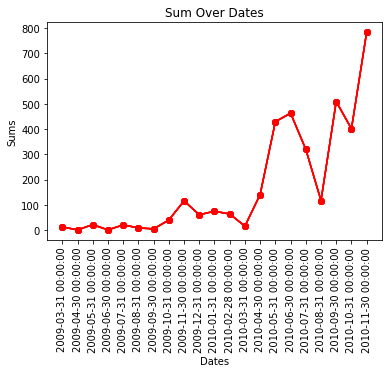

In [ ]:
dates = before_tweets_df_date.index 
sums = before_tweets_df_date.values 

fig, ax = plt.subplots()

ax.plot(range(len(dates)), sums, 'ro-')
ax.set_xticks(range(0, len(dates), 1))       # need to adjust to ensure plot is readable
ax.set_xticklabels(dates[::1], rotation=90)
ax.set_xlabel("Dates")
ax.set_ylabel("Sums")
ax.set_title("Sum Over Dates")
plt.show();

In [ ]:
# Drop unnecesary columns
before_tweets_df = before_tweets_df.drop(columns=['Datetime', 'Tweet Id','Username', 'Unnamed: 0'])

In [ ]:
# Change tweet column name
before_tweets_df.columns = before_tweets_df.columns.str.replace('Text', 'Original Tweet')

In [ ]:
# Add sentiment and tweet column
before_tweets_df['Tweet'] = np.nan
before_tweets_df

,Original Tweet,Tweet
0,"Handicapping the 2022 World Cup Candidates - Qatar – First of all, Qatar is HOT in the summer, like kill... http://tumblr.com/xfzxxnsrs",NaN
1,"Aussies 2022 World Cup bid takes a hit report ranks Aus last in revenue USA scored 100%, AUS 68%, Japan 73%, Sth Korea 71%, Qatar 70%",NaN
2,Branding The #Qatar World Cup 2022 Bid MT @RobaAssi: http://bit.ly/i9QfTS via @natashaTynes,NaN
3,Qatar 2022 World Cup Bid Gets Boost from Facebook – Mediabistro ... http://bit.ly/fOn8VA #worldcup,NaN
4,Spector scored those two goals in order to get back at Sir Alex Ferguson backing Qatar's 2022 World Cup Bid. #goUSAbid,NaN
...,...,...
3602,"RT @bbcme Qatar bids to host 2022 World Cup: Qatar is among 11 countries in contention to host the 2022 World Cup, the gov.. http://tiny ...",NaN
3603,Qatar bids to host 2022 World Cup http://bit.ly/1ADvUa,NaN
3604,BBC News | World: Qatar bids to host 2022 World Cup http://tinyurl.com/d6ppzj,NaN
3605,20 Qatar submits FIFA World Cup bid: FIFA heads meet Qatari FA delegation for 2018 and/or 2022 FIFA World Cup .. http://tinyurl.com/cgqgme,NaN


In [ ]:
# Pre-processing
def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.compile('https?://\S+|www\.\S+').sub(r'', tweet) # Remove hyperlinks

    if tweet.startswith("rt"): # Remove retweets (repetitions)
        i = tweet.find(':')
        if i != -1:
            tweet = tweet[i+2:]
    
    tweet = re.compile('@[^\s]+').sub(r'', tweet) # Mentions 
    tweet = re.compile(r'#([^\s]+)').sub(r'\1', tweet) # Remove hashtags
    tweet = re.sub('@', 'at', tweet)
    tweet = contractions.fix(tweet) # Fix english contractions
    tweet  = ''.join([char for char in tweet if char not in string.punctuation]) #Remove punctuation characters
    tweet = re.compile('[^A-Za-z]').sub(r' ', tweet) # Remove any other non-alphabet characters
    tweet = ' '.join([w for w in tweet.split() if w not in english_stopwords]) #Remove stop words  
    
    return tweet

In [ ]:
before_tweets_df['Tweet'] = before_tweets_df['Original Tweet'].apply(clean_tweet)
pd.reset_option("^display") # Return to normal display

In [ ]:
before_tweets_df = before_tweets_df.drop_duplicates(subset=['Tweet']) # Drop duplicate tweets
before_tweets_df.head(20)

,Original Tweet,Tweet
0,Handicapping the 2022 World Cup Candidates - Q...,handicapping world cup candidates qatar first ...
1,Aussies 2022 World Cup bid takes a hit report ...,aussies world cup bid takes hit report ranks a...
2,Branding The #Qatar World Cup 2022 Bid MT @Rob...,branding qatar world cup bid mt via
3,Qatar 2022 World Cup Bid Gets Boost from Faceb...,qatar world cup bid gets boost facebook mediab...
4,Spector scored those two goals in order to get...,spector scored two goals order get back sir al...
5,Qatar bidding nation FIFA world cup 2022,qatar bidding nation fifa world cup
6,#panorama fallout. My take http://ow.ly/3hyjz ...,panorama fallout take worldcup england russia ...
7,@kamzou08: Qatar 2022 World Cup Bid Gets Boost...,qatar world cup bid gets boost facebook mediab...
8,Qatar 2022 World Cup Bid Gets Boost from Faceb...,qatar world cup bid gets boost facebook mediab...
9,Qatar 2022 World Cup Bid Gets Boost from Faceb...,qatar world cup bid gets boost facebook mediab...


In [ ]:
#Use textblob's sentiment method to analyze sentiment of passed tweet
before_tweets_df[['Polarity', 'Subjectivity']] = before_tweets_df['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
nltk.downloader.download('vader_lexicon')

#Calculating Negative, Positive, Neutral and Compound values
for index, row in before_tweets_df['Tweet'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    pos = score['pos']
    comp = score['compound']
    
    if neg > pos:
        before_tweets_df.loc[index,'Sentiment'] = "-1"
    else :
        before_tweets_df.loc[index,'Sentiment'] = "1"
    
    before_tweets_df.loc[index,'neg'] = neg
    before_tweets_df.loc[index,'pos'] = pos
    before_tweets_df.loc[index,'compound'] = comp

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
before_tweets_df.head(10)

,Original Tweet,Tweet,Polarity,Subjectivity,Sentiment,neg,neu,pos,compound
0,Handicapping the 2022 World Cup Candidates - Q...,handicapping world cup candidates qatar first ...,0.25,0.591667,-1,0.29,0.556,0.154,-0.4939
1,Aussies 2022 World Cup bid takes a hit report ...,aussies world cup bid takes hit report ranks a...,0.00,0.066667,1,0.00,1.000,0.000,0.0000
2,Branding The #Qatar World Cup 2022 Bid MT @Rob...,branding qatar world cup bid mt via,0.00,0.000000,1,0.00,1.000,0.000,0.0000
3,Qatar 2022 World Cup Bid Gets Boost from Faceb...,qatar world cup bid gets boost facebook mediab...,0.00,0.000000,1,0.00,0.748,0.252,0.4019
4,Spector scored those two goals in order to get...,spector scored two goals order get back sir al...,0.00,0.000000,1,0.00,0.932,0.068,0.0258
5,Qatar bidding nation FIFA world cup 2022,qatar bidding nation fifa world cup,0.00,0.000000,1,0.00,1.000,0.000,0.0000
6,#panorama fallout. My take http://ow.ly/3hyjz ...,panorama fallout take worldcup england russia ...,0.00,0.000000,1,0.00,1.000,0.000,0.0000
7,@kamzou08: Qatar 2022 World Cup Bid Gets Boost...,qatar world cup bid gets boost facebook mediab...,0.00,0.000000,1,0.00,0.722,0.278,0.6597
8,Qatar 2022 World Cup Bid Gets Boost from Faceb...,qatar world cup bid gets boost facebook mediab...,0.00,0.000000,1,0.00,0.707,0.293,0.6597
9,Qatar 2022 World Cup Bid Gets Boost from Faceb...,qatar world cup bid gets boost facebook mediab...,0.00,0.000000,1,0.00,0.722,0.278,0.4019


In [ ]:
#New dataframes for all sentiments
before_tweets_negative = before_tweets_df[before_tweets_df['Sentiment']== '-1']
before_tweets_positive = before_tweets_df[before_tweets_df['Sentiment']== '1']

In [ ]:
before_tweets_df.dtypes

Original Tweet     object
Tweet              object
Polarity          float64
Subjectivity      float64
Sentiment          object
neg               float64
neu               float64
pos               float64
compound          float64
dtype: object

In [ ]:
before_tweets_df['Sentiment'] = before_tweets_df['Sentiment'].astype(str).astype(int)

<ipython-input-28-4717975a7855>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_tweets_df['Sentiment'] = before_tweets_df['Sentiment'].astype(str).astype(int)


In [ ]:
before_tweets_df.dtypes

Original Tweet     object
Tweet              object
Polarity          float64
Subjectivity      float64
Sentiment           int64
neg               float64
neu               float64
pos               float64
compound          float64
dtype: object

In [ ]:
# Count values of each sentiment 
def count_values_in_column(data,feature):
    total = data.loc[:,feature].value_counts(dropna = False)
    percentage = round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

count_values = count_values_in_column(before_tweets_df,'Sentiment')

In [ ]:
count_values

,Total,Percentage
1,2277,88.43
-1,298,11.57


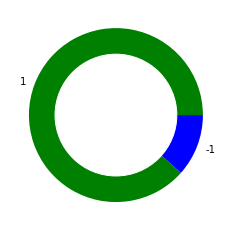

In [ ]:
# Pie Chart
sentiments = count_values.index
size = count_values['Percentage']
 
# Create a circle for the center of the plot
circle_chart = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(size, labels=sentiments, colors=['green','blue','red'])
p = plt.gcf()
p.gca().add_artist(circle_chart)
plt.show()

In [ ]:
#Function to create Wordcloud
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    stopwords.update(["qatar", "qatars", "world cup", "world cup 2022"])
    wc = WordCloud(stopwords=stopwords, background_color="white", mask = mask, max_words = 50).generate(text)
    wc.to_file('word_cloud.png')
    
    print('Word Cloud Saved')
    path = 'word_cloud.png'
    display(Image.open(path))

Word Cloud Saved


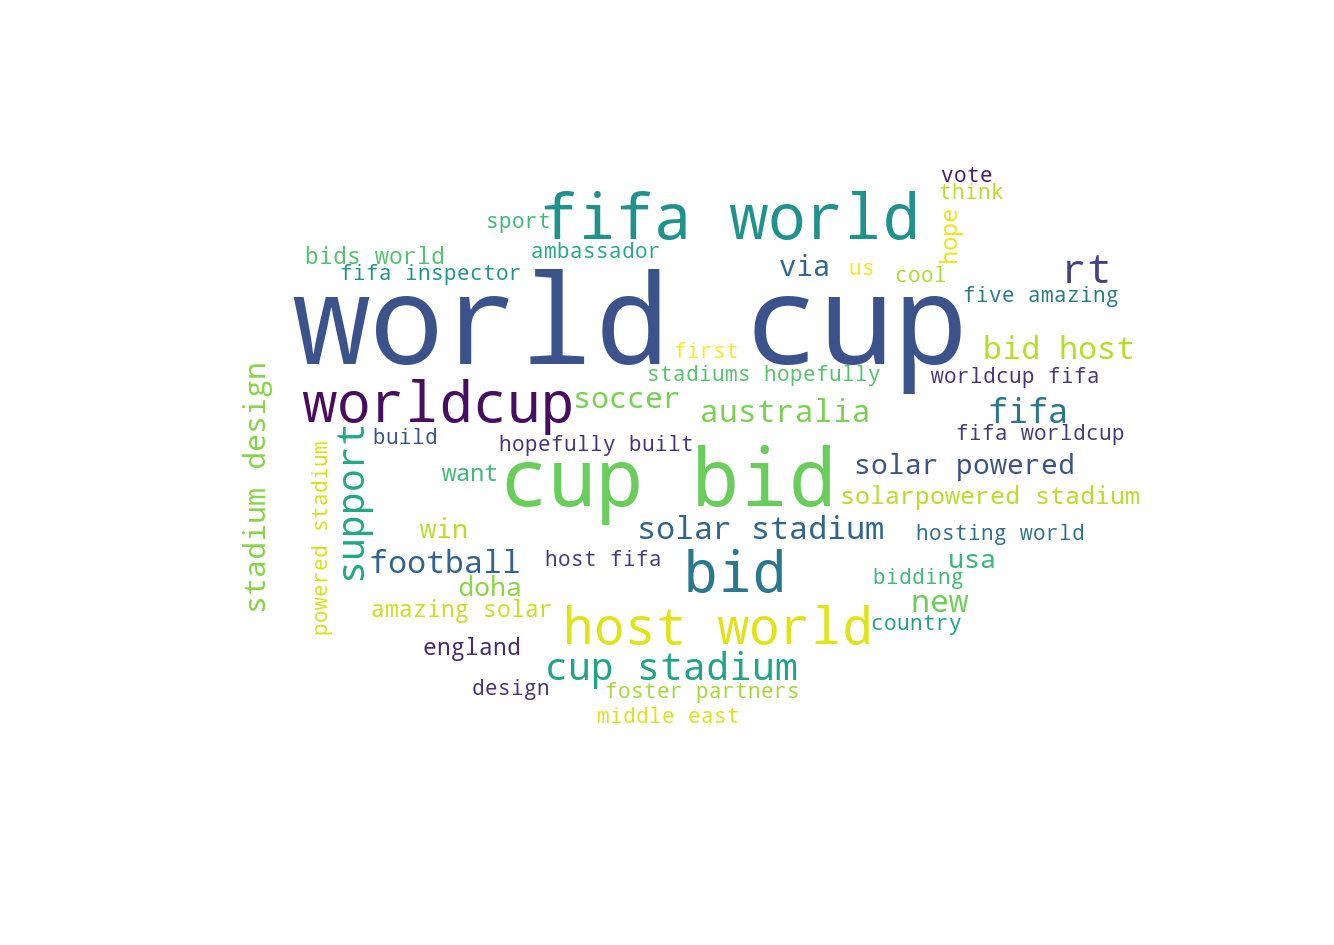

In [ ]:
# Positive sentiments Word cloud 
before_positive_values = " ".join(tw for tw in before_tweets_positive.Tweet)
create_wordcloud(before_positive_values)

Word Cloud Saved


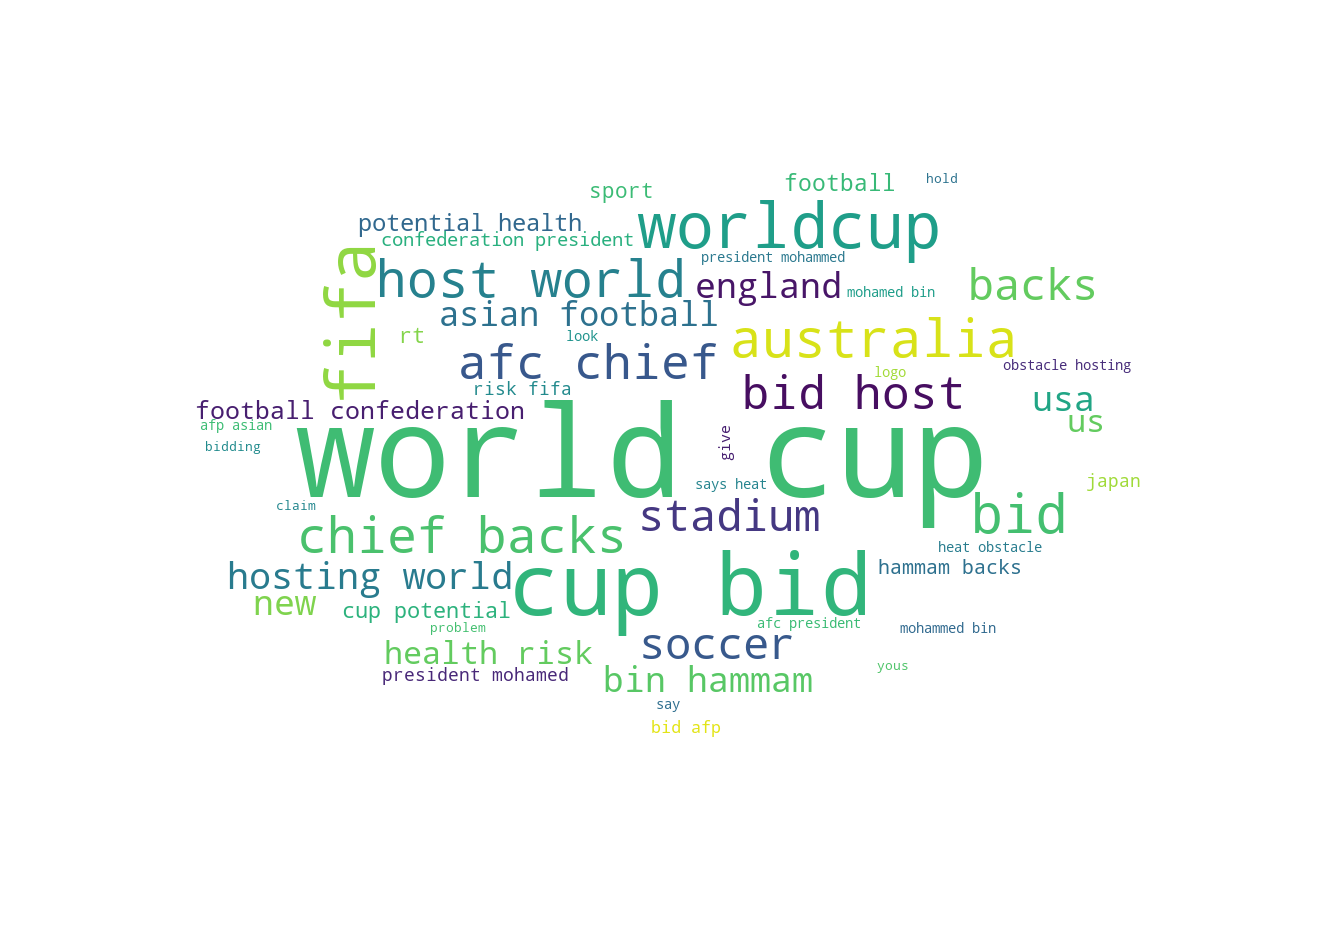

In [ ]:
# Negative sentiments Word cloud 
before_negative_values = " ".join(tw for tw in before_tweets_negative.Tweet)
create_wordcloud(before_negative_values)

In [ ]:
x = before_tweets_df.Tweet
y = before_tweets_df.Sentiment
from sklearn.model_selection import train_test_split
SEED = 2000

x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.3, random_state=SEED)

x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.3, random_state=SEED)

print ("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train), (len(x_train[y_train == -1]) / (len(x_train)*1.))*100, (len(x_train[y_train == 1]) / (len(x_train)*1.))*100))

print ("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation), (len(x_validation[y_validation == -1]) / (len(x_validation)*1.))*100, (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))

print ("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test), (len(x_test[y_test == -1]) / (len(x_test)*1.))*100, (len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

Train set has total 1802 entries with 11.93% negative, 88.07% positive
Validation set has total 541 entries with 9.61% negative, 90.39% positive
Test set has total 232 entries with 13.36% negative, 86.64% positive


In [ ]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
tbresult = [TextBlob(i).sentiment.polarity for i in x_validation]
tbpred = [-1 if n < -1 else 1 for n in tbresult]
conmat = np.array(confusion_matrix(y_validation, tbpred, labels=[1,-1]))
confusion = pd.DataFrame(conmat, index=[1, -1],
                         columns=['predicted_positive','predicted_negative'])
print ("Accuracy Score: {0:.2f}%".format(accuracy_score(y_validation, tbpred)*100))
print ("-"*80)
print ("Confusion Matrix\n")
print (confusion)
print ("-"*80)
print ("Classification Report\n")
print (classification_report(y_validation, tbpred))

Accuracy Score: 90.39%
--------------------------------------------------------------------------------
Confusion Matrix

    predicted_positive  predicted_negative
 1                 489                   0
-1                  52                   0
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        52
           1       0.90      1.00      0.95       489

    accuracy                           0.90       541
   macro avg       0.45      0.50      0.47       541
weighted avg       0.82      0.90      0.86       541



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
